In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

In [2]:
scratchHPC = r'O:\scratch\MultiPhase'

In [3]:
StudienOrdner = r'211209_GrainsizeConsider\Konstante_Volumen_10p'
StudienOrdner = os.path.join(scratchHPC, StudienOrdner)


ImageOrdner = os.path.join(StudienOrdner, '_image' )

if not os.path.exists(ImageOrdner):
    os.makedirs(ImageOrdner)

In [4]:
lf_csv = r'_eval/lifetime.csv'
lf_csv = os.path.join(StudienOrdner, lf_csv)

In [5]:
df_lf = pd.read_csv(lf_csv)

In [6]:
lf_csv_volstud = os.path.join(scratchHPC, r'Archive_importand_eval\37_Straincontrolled_1\lifetime_main.csv')
df_vol_lf = pd.read_csv(lf_csv_volstud)
df_vol_lf = df_vol_lf[df_vol_lf['StrainAmplitude'].isin([0.003,0.006,0.009])]
df_vol_lf

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData
0,0.0,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1070.059728,wholeMod,0.0,0.009,0.0,974.2910,-1.2130,0.044112,0.093569,2.521240,1.724138,0
1,0.1,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,2028.220614,Martensite,0.0,0.009,0.0,974.2910,-1.2130,0.022581,0.087651,1.870093,1.724138,0
2,0.2,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1070.059728,Ferrite,0.0,0.009,0.0,974.2910,-1.2130,0.044112,0.093569,2.521240,1.724138,0
3,1.0,DisTest_Seed93426_Strain0p6_VolumeFraction90,ALL,2855.763261,wholeMod,0.0,0.006,0.0,792.2645,-0.2895,0.024963,0.049594,2.521240,1.724138,0
4,1.1,DisTest_Seed93426_Strain0p6_VolumeFraction90,ALL,5444.687304,Martensite,0.0,0.006,0.0,792.2645,-0.2895,0.012735,0.029502,1.870093,1.724138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,27.1,WCurve_Seed45213_Strain0p3_VolumeFraction0,ALL,53185.779992,Ferrite,0.0,0.003,0.0,521.3565,-0.1495,0.004578,0.009986,2.521240,1.724138,0
386,28.0,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,wholeMod,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0
387,28.1,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,Ferrite,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0
388,29.0,WCurve_Seed54667_Strain0p3_VolumeFraction0,ALL,78208.138858,wholeMod,0.0,0.003,0.0,523.4565,-0.1445,0.003660,0.013767,2.521240,1.724138,0


In [7]:
ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('Strain')-1])   for kk in ll_Seed]

ll_cells = df_lf['ModelName'].tolist()
ll_cells = [int(kk[kk.find('NumberOfCells')+13:])   for kk in ll_cells]

ll_Seed_vol = df_vol_lf['ModelName'].tolist()
ll_Seed_vol = [str(kk[kk.find('_')+5:kk.find('Strain')-1])   for kk in ll_Seed_vol]

ll_volume = df_vol_lf['ModelName'].tolist()
ll_volume = [int(kk[kk.rfind('n')+1:])   for kk in ll_volume]

In [8]:
vol_fer = 0.1*((64*(10**(-6)))**3)
vol_fer

2.62144e-14

In [9]:
def vol_to_dist(vol):
    #V = 4/3 * pi * r**3
    
    r = vol*3
    r = r/(4*np.pi)
    r = r**(1/3)
    return r*2

In [10]:
ll_volf = [vol_fer/kk for kk in ll_cells]
ll_volf = [vol_to_dist(kk) for kk in ll_volf]

In [11]:
minimia_vol = min(ll_volf)
maxima_vol = max(ll_volf)

In [12]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed

df_wholMod = df_lf[df_lf['Phase']=='wholeMod']
df_Ferrite = df_lf[df_lf['Phase']=='Ferrite']
df_mart = df_lf[df_lf['Phase']=='Martensite']

df_vol_lf['Volume_Martensite'] = ll_volume
df_vol_lf['Seed'] = ll_Seed_vol

df_vol_wholMod = df_vol_lf[df_vol_lf['Phase']=='wholeMod']
df_vol_Ferrite = df_vol_lf[df_vol_lf['Phase']=='Ferrite']
df_vol_mart = df_vol_lf[df_vol_lf['Phase']=='Martensite']

In [13]:
colorsFerr = df_Ferrite['Volume_Martensite'].tolist()
colorsFerr = [float(c) for c in colorsFerr]

colorsMart = df_mart['Volume_Martensite'].tolist()
colorsMart = [int(c) for c in colorsMart]

Abwärts erstelle confidence intervalle

In [14]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_conf = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
ch_df_V = {'whole': df_vol_wholMod, 'Ferrite': df_vol_Ferrite, 'Martensite': df_vol_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'Grain_size': np.unique(ll_volf)})
    for strain in strainll:
        mean = []
        l_bound= []
        u_bound =  []
        for vols in np.unique(ll_volf):
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['Lifetime'].tolist()
            s_mean = np.mean(a)

            mean.append(s_mean)
        df_conf[strain] = mean
    dic_df_conf[dd] = df_conf
    



In [15]:
strainll = np.unique(df_vol_wholMod['StrainAmplitude'].tolist())
dic_df_vols = {}
for dd in dd_ll:
    df_conf = pd.DataFrame({'Volumes': np.unique(ll_volume)})
    for strain in strainll:
        mean = []
        l_bound= []
        u_bound =  []
        for vols in np.unique(ll_volume):
            rdf = ch_df_V[dd][ch_df_V[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['Lifetime'].tolist()
            s_mean = np.mean(a)
            mean.append(s_mean)
        df_conf[strain] = mean
    dic_df_vols[dd] = df_conf

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\hro7rng\.c

In [16]:
print(dic_df_vols['whole'])

   Volumes         0.003        0.006        0.009
0        0  74224.536975  4909.069612  1450.823010
1       85  55834.816933  4927.041842  1224.251748
2       90  46856.411982  4060.008161  1108.815488
3       95  44010.169553  4151.590282  1091.007907
4      100  50005.332399  5865.557860  1813.566176


Plotten der confidence Intervalle

In [17]:
#print(dic_df_conf['whole'].values.tolist())
cm_lb = dic_df_conf['whole'].columns.values
ll_ll_vals_whole = dic_df_conf['whole'].values.tolist()
ll_ll_vals_whole = [kk  for num,kk in enumerate(ll_ll_vals_whole)]# if num in [0,2,4]]
init_vals = ll_ll_vals_whole[2]
if len(ll_ll_vals_whole) == 3:
    init_vals = ll_ll_vals_whole[1]
#print(init_vals)
#print(ll_ll_vals_whole)
vgl_ll = []
for kk in ll_ll_vals_whole:
    l_o = [kk[0]]
    for rr in range(1,4):
        rel = (kk[rr])/ init_vals[rr]
        #print(kk[rr])
        #print(rr)
        #print(init_vals[rr])
        l_o.append(rel)
    
    vgl_ll.append(l_o)

print(vgl_ll)

[[4.174946877111681e-06, 1.6967152152331464, 1.2451468681494997, 2.0750546651016486], [6.161822382742208e-06, 1.5046370929056938, 0.929803256342624, 1.2188901194952964], [8.382510857855288e-06, 1.0, 1.0, 1.0], [1.0286346650611695e-05, 0.9085125920319123, 0.8256927985482801, 1.0941091795814781], [2.028289845615708e-05, 0.44251861848973617, 0.5057846928411346, 0.6225330917319922]]


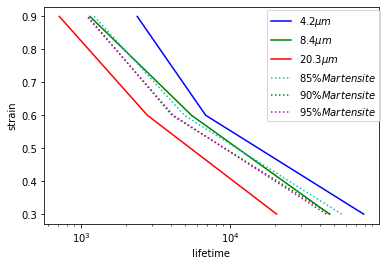

In [22]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['whole']
df_v_conf = dic_df_vols['whole']
ll_ll_vals = df_conf.values.tolist()
ll_ll_vals = [kk for num,kk in enumerate(ll_ll_vals) if not num in [1,3]]
ll_ll_vals_v = df_v_conf.values.tolist()
ll_ll_vals_v = [kk for num,kk in enumerate(ll_ll_vals_v) if num in [1,2,3]]
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(ll_ll_vals):
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= (format(rr[0]*1000000, '.1f')[:]+'$\mu m$') ,color=colorlist[num])

colorlist = ['c', 'g', 'm', 'c', 'm', 'y']
for num, rr in enumerate(ll_ll_vals_v):
    ax1.plot(rr[1:],df_v_conf.columns.values[1:]*100, label= (format(rr[0], '.0f')[:]+'$\% Martensite$'), linestyle=":" ,color=colorlist[num])
    

ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.65, 0.45))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime')
ax1.set_ylabel('strain')

datname = 'Korngr_vs_Volume_consideration_both_phases'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

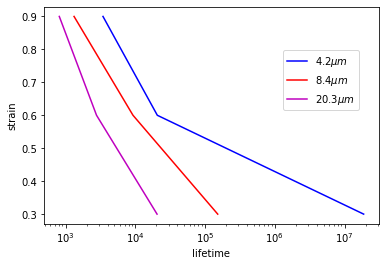

In [29]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
ll_ll_vals = df_conf.values.tolist()
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(ll_ll_vals):
    if num in [1,3]: continue
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= (format(rr[0]*1000000, '.1f')[:]+'$\mu m$') ,color=colorlist[num])
    
ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.7, 0.5))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime')
ax1.set_ylabel('strain')

datname = 'Korngr_Fert_Whoel'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

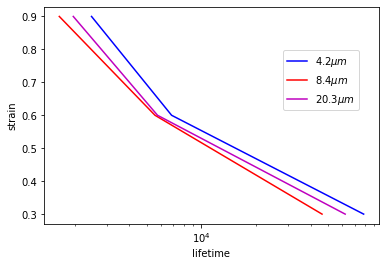

In [30]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
ll_ll_vals = df_conf.values.tolist()
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(ll_ll_vals):
    if num in [1,3]: continue
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= (format(rr[0]*1000000, '.1f')[:]+'$\mu m$') ,color=colorlist[num])
    
ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.7, 0.5))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime')
ax1.set_ylabel('strain')


datname = 'Korngr_Mart_Whoel'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[[4.174946877111681e-06, 1.6967152152331464, 1.2451468681494997, 2.0750546651016486], [8.382510857855288e-06, 1.0, 1.0, 1.0], [2.028289845615708e-05, 0.44251861848973617, 0.5057846928411346, 0.6225330917319922]]


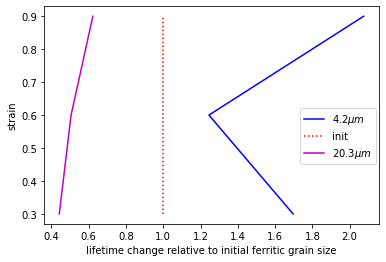

In [31]:
#print(dic_df_conf['whole'].values.tolist())
cm_lb = dic_df_conf['whole'].columns.values
ll_ll_vals_whole = dic_df_conf['whole'].values.tolist()
ll_ll_vals_whole = [kk  for num,kk in enumerate(ll_ll_vals_whole) if num in [0,2,4]]
init_vals = ll_ll_vals_whole[2]
if len(ll_ll_vals_whole) == 3:
    init_vals = ll_ll_vals_whole[1]
#print(init_vals)
#print(ll_ll_vals_whole)
vgl_ll = []
for kk in ll_ll_vals_whole:
    l_o = [kk[0]]
    for rr in range(1,4):
        rel = (kk[rr])/ init_vals[rr]
        #print(kk[rr])
        #print(rr)
        #print(init_vals[rr])
        l_o.append(rel)
    
    vgl_ll.append(l_o)

print(vgl_ll)

colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
linestyle_ll = ['-','-',':','-','-']

if len(vgl_ll)==3:
    colorlist = ['b', 'r',  'm', 'y']
    linestyle_ll = ['-',':','-']
df_conf = dic_df_conf['whole']
ll_ll_vals = df_conf.values.tolist()
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(vgl_ll):
    lbl = (format(rr[0]*1000000, '.1f')[:]+'$\mu m$')
    if num == 1: lbl = "init"
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= lbl ,color=colorlist[num], linestyle=linestyle_ll[num])
    
#ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.75, 0.25))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime change relative to initial ferritic grain size')
ax1.set_ylabel('strain')

datname = 'Korngr_Whole_rel'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[[4.174946877111681e-06, 123.48886831559325, 2.231818734092365, 2.5985315723613414], [8.382510857855288e-06, 1.0, 1.0, 1.0], [2.028289845615708e-05, 0.13498050254111643, 0.30018633693587643, 0.614456880552104]]


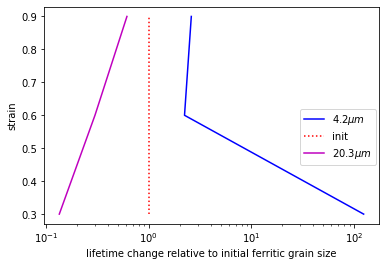

In [32]:
#print(dic_df_conf['whole'].values.tolist())
cm_lb = dic_df_conf['Ferrite'].columns.values
ll_ll_vals_whole = dic_df_conf['Ferrite'].values.tolist()
ll_ll_vals_whole = [kk  for num,kk in enumerate(ll_ll_vals_whole) if num in [0,2,4]]
init_vals = ll_ll_vals_whole[2]
if len(ll_ll_vals_whole) == 3:
    init_vals = ll_ll_vals_whole[1]
#print(init_vals)
#print(ll_ll_vals_whole)
vgl_ll = []
for kk in ll_ll_vals_whole:
    l_o = [kk[0]]
    for rr in range(1,4):
        rel = (kk[rr])/ init_vals[rr]
        #print(kk[rr])
        #print(rr)
        #print(init_vals[rr])
        l_o.append(rel)
    
    vgl_ll.append(l_o)

print(vgl_ll)

colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
linestyle_ll = ['-','-',':','-','-']

if len(vgl_ll)==3:
    colorlist = ['b', 'r',  'm', 'y']
    linestyle_ll = ['-',':','-']
df_conf = dic_df_conf['Ferrite']
ll_ll_vals = df_conf.values.tolist()
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(vgl_ll):
    lbl = (format(rr[0]*1000000, '.1f')[:]+'$\mu m$')
    if num == 1: lbl = "init"
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= lbl ,color=colorlist[num], linestyle=linestyle_ll[num])
    
ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.75, 0.25))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime change relative to initial ferritic grain size')
ax1.set_ylabel('strain')

datname = 'Korngr_Fert_rel'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[[4.174946877111681e-06, 1.6967152152331464, 1.2348372442425295, 1.506113035581539], [8.382510857855288e-06, 1.0, 1.0, 1.0], [2.028289845615708e-05, 1.3417211881203066, 1.0324587842320925, 1.1945166199706119]]


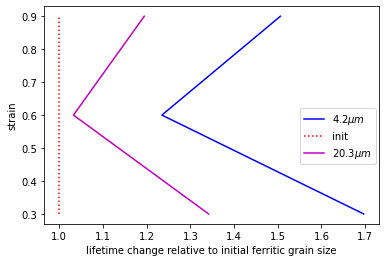

In [33]:
#print(dic_df_conf['whole'].values.tolist())
cm_lb = dic_df_conf['Martensite'].columns.values
ll_ll_vals_whole = dic_df_conf['Martensite'].values.tolist()
ll_ll_vals_whole = [kk  for num,kk in enumerate(ll_ll_vals_whole) if num in [0,2,4]]
init_vals = ll_ll_vals_whole[2]
if len(ll_ll_vals_whole) == 3:
    init_vals = ll_ll_vals_whole[1]
#print(init_vals)
#print(ll_ll_vals_whole)
vgl_ll = []
for kk in ll_ll_vals_whole:
    l_o = [kk[0]]
    for rr in range(1,4):
        rel = (kk[rr])/ init_vals[rr]
        #print(kk[rr])
        #print(rr)
        #print(init_vals[rr])
        l_o.append(rel)
    
    vgl_ll.append(l_o)

print(vgl_ll)

colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
linestyle_ll = ['-','-',':','-','-']

if len(vgl_ll)==3:
    colorlist = ['b', 'r',  'm', 'y']
    linestyle_ll = ['-',':','-']
df_conf = dic_df_conf['Martensite']
ll_ll_vals = df_conf.values.tolist()
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
for num, rr in enumerate(vgl_ll):
    lbl = (format(rr[0]*1000000, '.1f')[:]+'$\mu m$')
    if num == 1: lbl = "init"
    ax1.plot(rr[1:],df_conf.columns.values[1:]*100, label= lbl ,color=colorlist[num], linestyle=linestyle_ll[num])
    
#ax1.set_xscale('log')
ax1.legend(loc= 'lower left',bbox_to_anchor=(0.75, 0.25))#,title='Strain')#, ncol=2 )
ax1.set_xlabel('lifetime change relative to initial ferritic grain size')
ax1.set_ylabel('strain')

datname = 'Korngr_Mart_rel'  
tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[4.17494688e-06 6.16182238e-06 8.38251086e-06 1.02863467e-05
 2.02828985e-05]


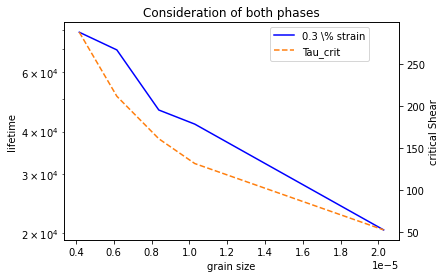

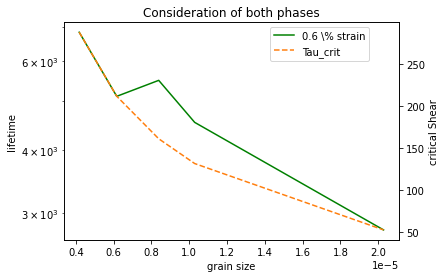

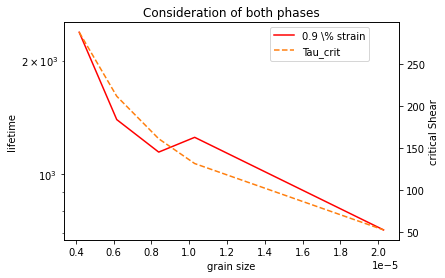

In [34]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['whole']
ll_volf = [kk  for kk in ll_volf if kk not in [75.0, 80.0]]

#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ll_grainsize = np.unique(ll_volf)
print(ll_grainsize)
crit_tau = [287.7, 211.5, 160.9,131.4, 52.4  ]
for num, vols in enumerate(strainll):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_conf['Grain_size'],df_conf[vols], label= (format(vols*100, '.1f')[:]+' \% strain') ,color=colorlist[num])
    ax2.plot(ll_grainsize, crit_tau, label= 'Tau_crit', color='tab:orange',linestyle='dashed')
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
    ax1.set_yscale('log')
    plt.title('Consideration of both phases')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

#axis_1.legend(lines, labels, loc=0)

    ax1.legend(lines, labels, loc= 'lower left',bbox_to_anchor=(0.6, 0.8))#,title='Strain')#, ncol=2 )
    ax1.set_ylabel('lifetime')
    ax1.set_xlabel('grain size')



    ax2.set_ylabel('critical Shear')#, color='y')
    #plt.xlim([5*10**2,5*10**5])
    strainss = '0'+str(int(vols*1000))
    datname = 'Korngr_ConfLifetimeWholeMod_strain' + strainss 
    tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
    plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[4.17494688e-06 6.16182238e-06 8.38251086e-06 1.02863467e-05
 2.02828985e-05]


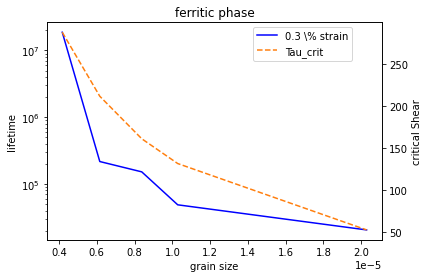

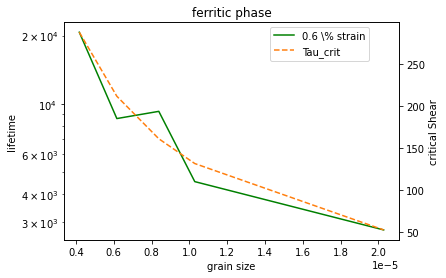

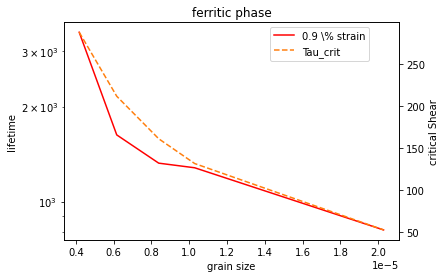

In [35]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
ll_volf = [kk  for kk in ll_volf if kk not in [75.0, 80.0]]

#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ll_grainsize = np.unique(ll_volf)
print(ll_grainsize)
crit_tau = [287.7, 211.5, 160.9,131.4, 52.4  ]
for num, vols in enumerate(strainll):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_conf['Grain_size'],df_conf[vols], label= (format(vols*100, '.1f')[:]+' \% strain') ,color=colorlist[num])
    ax2.plot(ll_grainsize, crit_tau, label= 'Tau_crit', color='tab:orange',linestyle='dashed')
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
    ax1.set_yscale('log')
    plt.title('ferritic phase')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

#axis_1.legend(lines, labels, loc=0)

    ax1.legend(lines, labels, loc= 'lower left',bbox_to_anchor=(0.6, 0.8))#,title='Strain')#, ncol=2 )
    ax1.set_ylabel('lifetime')
    ax1.set_xlabel('grain size')



    ax2.set_ylabel('critical Shear')#, color='y')
    #plt.xlim([5*10**2,5*10**5])
    strainss = '0'+str(int(vols*1000))
    datname = 'Korngr_ConfLifetimeFerrie_strain' + strainss 
    tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
    plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

[4.17494688e-06 6.16182238e-06 8.38251086e-06 1.02863467e-05
 2.02828985e-05]


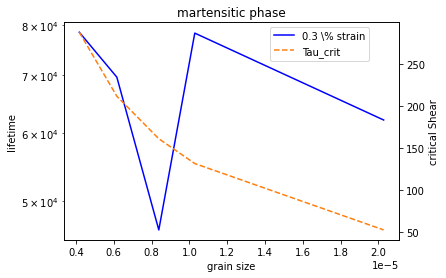

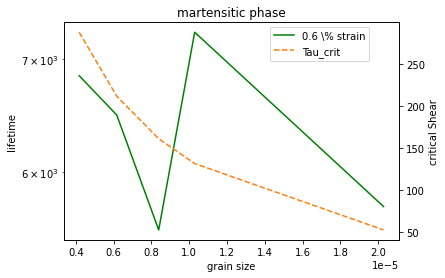

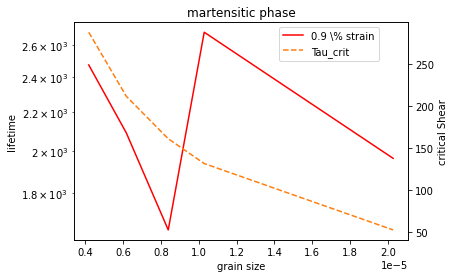

In [36]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
ll_volf = [kk  for kk in ll_volf if kk not in [75.0, 80.0]]

#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
ll_grainsize = np.unique(ll_volf)
print(ll_grainsize)
crit_tau = [287.7, 211.5, 160.9,131.4, 52.4  ]
for num, vols in enumerate(strainll):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(df_conf['Grain_size'],df_conf[vols], label= (format(vols*100, '.1f')[:]+' \% strain') ,color=colorlist[num])
    ax2.plot(ll_grainsize, crit_tau, label= 'Tau_crit', color='tab:orange',linestyle='dashed')
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
    ax1.set_yscale('log')
    plt.title('martensitic phase')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()

    lines = lines_1 + lines_2
    labels = labels_1 + labels_2

#axis_1.legend(lines, labels, loc=0)

    ax1.legend(lines, labels, loc= 'lower left',bbox_to_anchor=(0.6, 0.8))#,title='Strain')#, ncol=2 )
    ax1.set_ylabel('lifetime')
    ax1.set_xlabel('grain size')



    ax2.set_ylabel('critical Shear')#, color='y')
    #plt.xlim([5*10**2,5*10**5])
    strainss = '0'+str(int(vols*1000))
    datname = 'Korngr_ConfLifetimeMart_strain' + strainss 
    tikzplotlib.save(os.path.join(ImageOrdner, datname +'.tex'))
    plt.savefig(os.path.join(ImageOrdner, datname +'.png'), bbox_inches='tight', dpi=150, transparent=True)

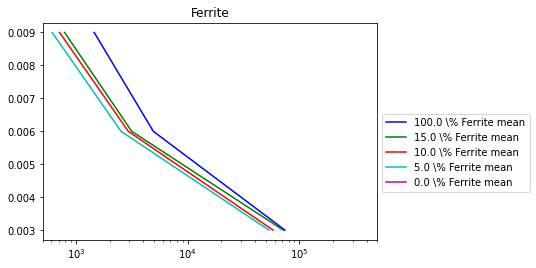

In [23]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    #if num%2 == 0:
        volls_red.append(vols)
    
for num, vols in enumerate(volls_red):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(100-vols)+' \% Ferrite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.title('Ferrite')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.xlim([5*10**2,5*10**5])

tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.png'), bbox_inches='tight', dpi=150, transparent=True)


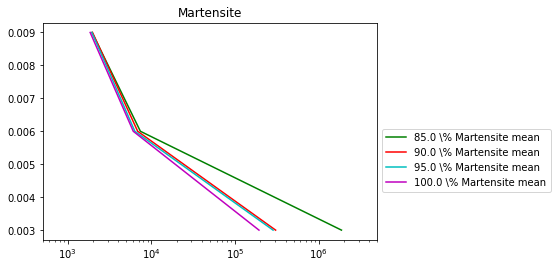

In [24]:
colorlist = ['g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    if num%2 == 0:
        volls_red.append(vols)
volls_red = [85.0,90.0,95.0,100.0]
for num, vols in enumerate(volls_red):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.xlim([5*10**2,5*10**6])
plt.legend(loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.title('Martensite')


tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.png'), bbox_inches='tight', dpi=150, transparent=True)


In [25]:
### AChtung lower bound ist nicht ganz korrekt das dieser durch die große varianz eine negative Lebensdauer angeben würde
### dacher ist in diesen Fällen der Lower Bound = minimum der Lebenszeit für definierte Dehnung und Volumengehalt

In [37]:
mnbv= df_lf[df_lf['StrainAmplitude']==0.009]
mnbv= mnbv[mnbv['Seed']=='93426']
mnbv[mnbv['Volume_Martensite'].isin([95.0,75.0])]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed


Bestimme liegt geringste Lebenszeit immer mit Ferrit zusammen? 

In [38]:
df_03 = df_lf[df_lf['StrainAmplitude']==0.003]
df_06 = df_lf[df_lf['StrainAmplitude']==0.006]
df_09 = df_lf[df_lf['StrainAmplitude']==0.009]

In [39]:
c_df = df_09 
ll_model = c_df['Unnamed: 0'].tolist()


ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = c_df[c_df['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        
        for ph in phases:
            if float(c_df[c_df['Unnamed: 0'] == ph]['Lifetime']) == float(ltime):
                ll_prob_phase.append([len(phases),df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]])        

print(np.unique(ll_prob_phase,axis=0))

[['2' 'Ferrite']
 ['2' 'Martensite']]


In [40]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        ltime = 9e300
        phaseprob = ''
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) < ltime:
                ltime = float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime'])
                phaseprob = df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]
        ll_prob_phase.append([len(phases),phaseprob])        

print(np.unique(ll_prob_phase,axis=0))

[['2' 'Ferrite']
 ['2' 'Martensite']]


In [41]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_StressAmp = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StrainAmplitude': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['StressAmplitude'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_StressAmp[dd] = df_conf

Plotten confidence Intervalle bezogen auf Stress::

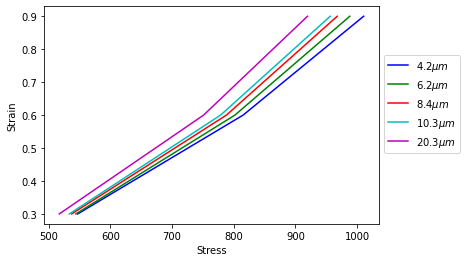

In [45]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(np.unique(ll_volf)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude']*100, label= (format(vols*1000000, '.1f')[:]+'$\mu m$'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )
plt.xlabel('Stress')
plt.ylabel('Strain')
plt.title('')


tikzplotlib.save(os.path.join(ImageOrdner, 'StressAmplitude.tex'))
plt.savefig(os.path.join(ImageOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)


In [29]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(np.unique(ll_volf)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude']*100, label= (format(vols*1000000, '.1f')[:]+'$\mu m$'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )
plt.xlabel('Stress')
plt.ylabel('Strain')
plt.title('')


tikzplotlib.save(os.path.join(ImageOrdner, 'StressAmplitude.tex'))
plt.savefig(os.path.join(ImageOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)

,StrainAmplitude,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 75.0,mean VolF 75.0,u_bound VolF 75.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,...,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,0.003,NaN,NaN,NaN,69877.611436,2.428440e+06,5.613698e+06,64544.756016,2.543375e+06,7.579686e+06,...,5.334300e+06,10514.750585,304211.049288,597907.347991,27384.482833,283573.286542,539762.090250,120339.512395,192458.384188,264577.255981
1,0.006,NaN,NaN,NaN,4282.766292,1.034325e+04,1.640373e+04,5045.972618,7.207025e+03,9.368077e+03,...,9.336449e+03,5414.871298,6839.303550,8263.735801,5038.210848,6328.894755,7619.578662,5132.530154,6059.122379,6985.714604
2,0.009,NaN,NaN,NaN,1491.825377,2.636445e+03,3.781065e+03,1598.641830,1.984497e+03,2.370352e+03,...,2.305146e+03,1605.986240,1974.179768,2342.373297,1619.454126,1939.427148,2259.400170,1602.655806,1851.664475,2100.673144


BoxPlots:-->

WholeMod

In [38]:
max_life = max(df_lf['Lifetime'].tolist())
min_life = min(df_lf['Lifetime'].tolist())

In [39]:
red_vols = [100.0, 95.0,90.0, 85.0, 0.0]
red_vols = np.unique(red_vols)
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

In [40]:
dic_df_whole_strains = {}
un_whole_strains = np.unique(df_wholMod['StrainAmplitude'].tolist())
for strains in un_whole_strains:
    whole_vols = df_wholMod[df_wholMod['StrainAmplitude']==strains]
    red_vols_df = whole_vols[whole_vols['Volume_Martensite'].isin(red_vols)]
    dic_df_whole_strains[strains] = {'wholestrain': red_vols_df}

In [41]:
volumes = []
for strains, dic in dic_df_whole_strains.items():
    un_whole_vol = np.unique(df_wholMod['Volume_Martensite'].tolist())
    un_whole_vol = [kk for kk in un_whole_vol if kk in red_vols]
    df_bb = dic['wholestrain']
    for volumes in un_whole_vol:
           dic_df_whole_strains[strains][volumes] = df_bb[df_bb['Volume_Martensite']==volumes]
    dic_df_whole_strains[strains]['volumes'] = list(un_whole_vol)
    

In [42]:
for strains, dic in dic_df_whole_strains.items():
    ll_life = []
    dic_df_whole_strains[strains]['LL_lifetime'] = ""
    for key, di in dic.items():
        if key in dic['volumes']:
            ll_life.append(di['Lifetime'].tolist())
    dic_df_whole_strains[strains]['LL_lifetime'] = ll_life

del ll_life

In [43]:
def setBoxColors(bp, re_vols):
    #colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
    for box in range(len(re_vols)):
        plt.setp(bp['boxes'][box], color=colorlist[box])
        plt.setp(bp['caps'][(box*2)+1], color=colorlist[box])
        
        plt.setp(bp['caps'][(box*2)], color=colorlist[box])
        plt.setp(bp['whiskers'][(box*2)+1], color=colorlist[box])
        plt.setp(bp['whiskers'][(box*2)], color=colorlist[box])
        #plt.setp(bp['fliers'][box], color=colorlist[box])
        plt.setp(bp['medians'][box], color=colorlist[box])

Strain 0.003 Boxplots

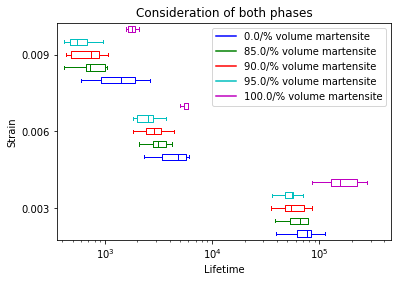

In [44]:
fig = plt.figure()
ax = plt.axes()
#plt.hold(True)
ticklist = []
positions = [kk+1 for kk in range(len(red_vols))]
min_lim = 1e200
max_lim = 0
for strain in un_whole_strains:
#strain = 0.003
    mx = max([max(kk) for kk in dic_df_whole_strains[strain]['LL_lifetime'] ])
    mn = min([min(kk) for kk in dic_df_whole_strains[strain]['LL_lifetime'] ])
    if mn<min_lim: min_lim = mn
    if mx>max_lim: max_lim = mx
         
    bp = plt.boxplot(dic_df_whole_strains[strain]['LL_lifetime'], positions=positions, vert=False, sym = "", labels= red_vols)
    setBoxColors(bp, red_vols)
    ticklist.append(np.mean(positions))
    positions = [kk+1+len(positions) for kk in positions]


#plt.yticks([num +1 for num in range(len(dic_df_whole_strains[strain]['volumes']))], dic_df_whole_strains[strain]['volumes'])

ylabel = [str(kk) for kk in un_whole_strains]
plt.yticks(ticklist, ylabel)
plt.xlabel('Lifetime')
plt.ylabel('Strain')
plt.title('Consideration of both phases')
#plt.legend([colorlist[kk] for kk in range(len(red_vols))],red_vols,loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )legend((hB, hR),('Apples', 'Oranges'))
#plt.legend()
plt.xscale('log')
plt.xlim(min_lim*0.85, max_lim*1.1)
## custom legend
leg=[]
for num, kk in enumerate(red_vols):
    #leg = [plt.plot([1,1],colorlist[num]+'-')  for num, kk in enumerate(red_vols)]
    hh, = plt.plot([1,1],colorlist[num]+'-')
    #hh.set_visible(False)
    leg.append(hh)
plt.legend(leg, [str(kk)+ '/% volume martensite' for kk in red_vols])

tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Whole_whoeler.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Whole_whoeler.png'), bbox_inches='tight', dpi=150, transparent=True)

In [45]:
df_wholMod[df_wholMod['Volume_Martensite'] == 100.0]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
36,12.0,DisTest_Seed25609_Strain0p9_VolumeFraction100,ALL,1582.940817,wholeMod,0.0,0.009,0.0,1662.6600,0.0000,0.007190,0.010937,0.515708,1.724138,0,100.0,25609
47,16.0,DisTest_Seed54667_Strain0p6_VolumeFraction100,ALL,9328.333886,wholeMod,0.0,0.006,0.0,1153.7700,0.0000,0.002570,0.007027,0.515708,1.724138,0,100.0,54667
55,19.0,DisTest_Seed25609_Strain0p6_VolumeFraction100,ALL,5896.393760,wholeMod,0.0,0.006,0.0,1155.7700,0.0000,0.003353,0.005956,0.515708,1.724138,0,100.0,25609
63,22.0,DisTest_Seed54667_Strain0p3_VolumeFraction100,ALL,426095.672227,wholeMod,0.0,0.003,0.0,625.0670,-0.0050,0.000280,0.001563,0.515708,1.724138,0,100.0,54667
71,25.0,DisTest_Seed93426_Strain0p6_VolumeFraction100,ALL,5749.503117,wholeMod,0.0,0.006,0.0,1154.6950,-0.0050,0.003403,0.005795,0.515708,1.724138,0,100.0,93426
94,33.0,DisTest_Seed45213_Strain0p6_VolumeFraction100,ALL,5880.405850,wholeMod,0.0,0.006,0.0,1157.3150,-0.0050,0.003359,0.006404,0.515708,1.724138,0,100.0,45213
141,49.0,DisTest_Seed36003_Strain0p3_VolumeFraction100,ALL,276105.921525,wholeMod,0.0,0.003,0.0,626.6880,-0.0050,0.000360,0.001445,0.515708,1.724138,0,100.0,36003
182,63.0,DisTest_Seed81296_Strain0p9_VolumeFraction100,ALL,1555.785353,wholeMod,0.0,0.009,0.0,1662.5950,-0.0050,0.007262,0.011838,0.515708,1.724138,0,100.0,81296
217,75.0,DisTest_Seed45213_Strain0p3_VolumeFraction100,ALL,128260.064015,wholeMod,0.0,0.003,0.0,626.9380,-0.0050,0.000562,0.001714,0.515708,1.724138,0,100.0,45213
222,77.0,DisTest_Seed54667_Strain0p9_VolumeFraction100,ALL,2741.689491,wholeMod,0.0,0.009,0.0,1659.8900,0.0000,0.005228,0.012631,0.515708,1.724138,0,100.0,54667


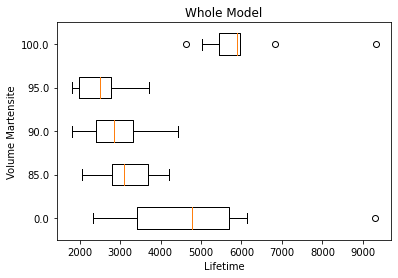

In [46]:
strain = 0.006
plt.boxplot(dic_df_whole_strains[strain]['LL_lifetime'], vert=False)
plt.yticks([num +1 for num in range(len(dic_df_whole_strains[strain]['volumes']))], dic_df_whole_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Whole Model')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Whole_strain06.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Whole_strain06.png'), bbox_inches='tight', dpi=150, transparent=True)

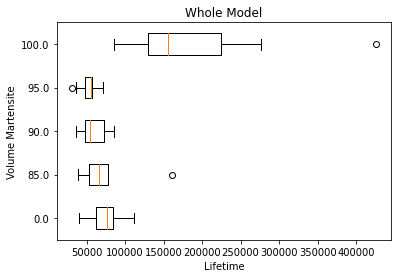

In [48]:
strain = 0.003

plt.boxplot(dic_df_whole_strains[strain]['LL_lifetime'], vert=False)
plt.yticks([num +1 for num in range(len(dic_df_whole_strains[strain]['volumes']))], dic_df_whole_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Whole Model')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Whole_strain03.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Whole_strain03.png'), bbox_inches='tight', dpi=150, transparent=True)

Boxplot für Ferritische Phase

In [192]:
dic_df_Ferrite_strains = {}
un_Ferrite_strains = np.unique(df_Ferrite['StrainAmplitude'].tolist())
for strains in un_Ferrite_strains:
    dic_df_Ferrite_strains[strains] = {'wholestrain': df_Ferrite[df_Ferrite['StrainAmplitude']==strains]}

In [193]:
volumes = []
for strains, dic in dic_df_Ferrite_strains.items():
    un_ferrite_vol = np.unique(df_Ferrite['Volume_Martensite'].tolist())
    df_bb = dic['wholestrain']
    for volumes in un_ferrite_vol:
        dic_df_Ferrite_strains[strains][volumes] = df_bb[df_bb['Volume_Martensite']==volumes]
    dic_df_Ferrite_strains[strains]['volumes'] = [kk for kk in un_ferrite_vol]
    

In [194]:
for strains, dic in dic_df_Ferrite_strains.items():
    ll_life = []
    dic_df_Ferrite_strains[strains]['LL_lifetime'] = ""
    for key, di in dic.items():
        if key in dic['volumes']:
            ll_life.append(di['Lifetime'].tolist())
    dic_df_Ferrite_strains[strains]['LL_lifetime'] = ll_life

del ll_life

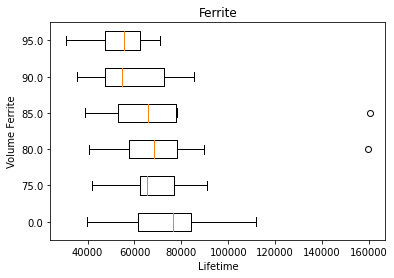

In [195]:
strain = 0.003
#dic_df_Ferrite_strains[strain]['volumes'] = [100 - kk for kk in dic_df_Ferrite_strains[strain]['volumes']]
plt.boxplot(dic_df_Ferrite_strains[strain]['LL_lifetime'], vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Ferrite_strains[strain]['volumes']))], dic_df_Ferrite_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Ferrite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain03.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain03.png'), bbox_inches='tight', dpi=150, transparent=True)

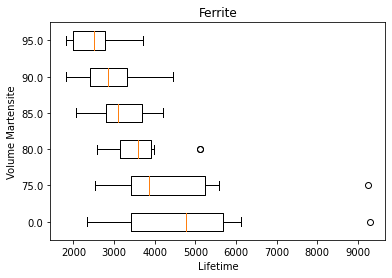

In [196]:
strain = 0.006
plt.boxplot(dic_df_Ferrite_strains[strain]['LL_lifetime'], vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Ferrite_strains[strain]['volumes']))], dic_df_Ferrite_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Ferrite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain06.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain06.png'), bbox_inches='tight', dpi=150, transparent=True)

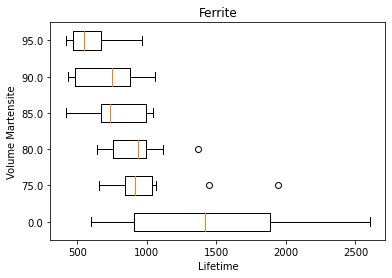

In [199]:
strain = 0.009
plt.boxplot(dic_df_Ferrite_strains[strain]['LL_lifetime'], vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Ferrite_strains[strain]['volumes']))], dic_df_Ferrite_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Ferrite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain09.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Ferrite_strain09.png'), bbox_inches='tight', dpi=150, transparent=True)

Boxplot für Martensitische Phase

In [154]:
dic_df_Mart_strains = {}
un_Mart_strains = np.unique(df_mart['StrainAmplitude'].tolist())
for strains in un_Mart_strains:
    dic_df_Mart_strains[strains] = {'wholestrain': df_mart[df_mart['StrainAmplitude']==strains]}

In [155]:
volumes = []
for strains, dic in dic_df_Mart_strains.items():
    un_mart_vol = np.unique(df_mart['Volume_Martensite'].tolist())
    df_bb = dic['wholestrain']
    for volumes in un_mart_vol:
        dic_df_Mart_strains[strains][volumes] = df_bb[df_bb['Volume_Martensite']==volumes]
    dic_df_Mart_strains[strains]['volumes'] = list(un_mart_vol)
    

In [156]:
for strains, dic in dic_df_Mart_strains.items():
    ll_life = []
    dic_df_Mart_strains[strains]['LL_lifetime'] = ""
    for key, di in dic.items():
        if key in dic['volumes']:
            ll_life.append(di['Lifetime'].tolist())
    dic_df_Mart_strains[strains]['LL_lifetime'] = ll_life

del ll_life

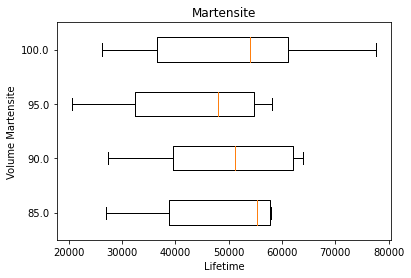

In [157]:
strain = 0.003
plt.boxplot(dic_df_Mart_strains[strain]['LL_lifetime'], sym="", vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Mart_strains[strain]['volumes']))], dic_df_Mart_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Martensite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Mart_strain03.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Mart_strain03.png'), bbox_inches='tight', dpi=150, transparent=True)

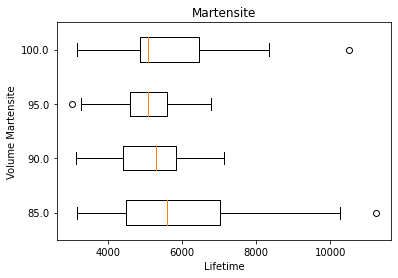

In [158]:
strain = 0.006
plt.boxplot(dic_df_Mart_strains[strain]['LL_lifetime'], vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Mart_strains[strain]['volumes']))], dic_df_Mart_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Martensite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Mart_strain06.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Mart_strain06.png'), bbox_inches='tight', dpi=150, transparent=True)

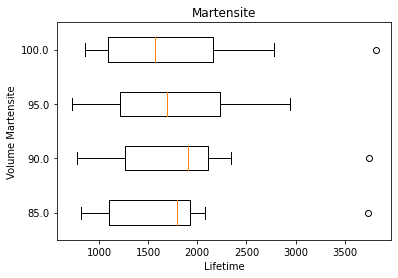

In [159]:
strain = 0.009
plt.boxplot(dic_df_Mart_strains[strain]['LL_lifetime'], vert=False)

plt.yticks([num +1 for num in range(len(dic_df_Mart_strains[strain]['volumes']))], dic_df_Mart_strains[strain]['volumes'])

plt.xlabel('Lifetime')
plt.ylabel('Volume Martensite')
plt.title('Martensite')


tikzplotlib.save(os.path.join(ImageOrdner, 'Boxplot_Mart_strain09.tex'))
plt.savefig(os.path.join(ImageOrdner, 'Boxplot_Mart_strain09.png'), bbox_inches='tight', dpi=150, transparent=True)